# Problem figure

In [26]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("/home/local/VANDERBILT/litz/github/MASILab/thoraxtools/func")
import vis.paral_clip_overlay_mask as overlay
sys.path.append('/home/local/VANDERBILT/litz/github/MASILab/thoraxtools/func/vis')
from vis import vis

In [13]:
emp_path = "/home/local/VANDERBILT/litz/github/MASILab/emphysema/data/JoHof_fused_results.csv"
emp_df = pd.read_csv(emp_path, converters={'pid':str, 'session':str})
emp_df

,pid,session,Section,Lobe Volume,LAV,LAV %,Residual Volume,Residual %
0,00000251,20180711,Left upper,1051.753392,174.987312,0.166377,876.766079,0.833623
1,00000251,20180711,Left lower,1274.740896,149.558682,0.117325,1125.182214,0.882675
2,00000251,20180711,Right upper,891.853766,123.440129,0.138408,768.413637,0.861592
3,00000251,20180711,Right middle,446.401369,66.018264,0.147890,380.383106,0.852110
4,00000251,20180711,Right lower,1226.648213,167.282738,0.136374,1059.365475,0.863626
...,...,...,...,...,...,...,...,...
11915,00000721,20170710,Right middle,297.628939,0.696839,0.002341,296.932101,0.997659
11916,00000721,20170710,Right lower,1034.989917,2.778382,0.002684,1032.211535,0.997316
11917,00000721,20170710,Left,1948.643944,5.863313,0.003009,1942.780631,0.996991
11918,00000721,20170710,Right,2213.967464,5.397508,0.002438,2208.569956,0.997562


In [104]:
severe_emp = emp_df[(emp_df['Section']=='All') & (emp_df['LAV %'] >= 0.1)]
severe_emp

,pid,session,Section,Lobe Volume,LAV,LAV %,Residual Volume,Residual %
7,00000251,20180711,All,4891.397635,681.287125,0.139283,4210.110511,0.860717
63,00001104,20180216,All,7611.162802,1510.008092,0.198394,6101.154709,0.801606
71,00001104,20130130,All,7500.668215,1302.177561,0.173608,6198.490654,0.826392
79,00001104,20140312,All,7535.957434,1386.281542,0.183956,6149.675892,0.816044
87,00001104,20150820,All,7433.546024,1465.718874,0.197176,5967.827150,0.802824
...,...,...,...,...,...,...,...,...
11687,00000552,20170315,All,7709.059399,1125.532033,0.146001,6583.527366,0.853999
11863,00000285,20170605,All,6972.908988,835.680643,0.119847,6137.228345,0.880153
11871,00000285,20160603,All,7557.109574,976.873588,0.129266,6580.235986,0.870734
11895,00001044,20180117,All,7569.523972,906.936030,0.119814,6662.587943,0.880186


In [111]:
def vis_double_overlay_slices(img, labels, xyz, orientation="LAS", cmaps=["turbo", "gray"], alphas=[0.5, 0.5], clip_range=(-1024, 600), mask_range=(0,5)):
    img_clips = vis.clip_LAS(img, xyz) if orientation == "LAS" else vis.clip_LPS(img, xyz)
    
    label_clips = []
    for label in labels:
        label = np.where(label == 0, np.nan, label)
        label_clip = vis.clip_LAS(label, xyz) if orientation == "LAS" else vis.clip_LPS(label, xyz)
        label_clips.append(label_clip)
    
    if len(clip_range) > 0:
        vmin = clip_range[0]
        vmax = clip_range[1]
    else:
        vmax = np.max(img)
        vmin = np.min(img)
    f, ax = plt.subplots(1, 3, figsize=(15, 15))
    
    for plane in range(3):
        ax[plane].imshow(img_clips[plane], interpolation='bilinear', cmap="gray", alpha=1.0, vmin=clip_range[0],
                   vmax=clip_range[1])
        for i, label_clip in enumerate(label_clips):
            # ax[plane].imshow(label_clip[plane], interpolation='none', cmap=cmap, alpha=0.5, vmin=mask_range[0], vmax=mask_range[1])
            ax[plane].imshow(label_clip[plane], interpolation='none', cmap=cmaps[i], alpha=alphas[i], vmin=mask_range[0], vmax=mask_range[1])
            
            
#     sag = ax[0].imshow(img_clip_sag, interpolation='bilinear', cmap="gray", alpha=1.0, vmin=clip_range[0],
#                        vmax=clip_range[1])
#     ax[0].imshow(label_clip_sag, interpolation='none', cmap=cmap, alpha=0.5, vmin=mask_range[0], vmax=mask_range[1])
#     ax[1].imshow(img_clip_cor, interpolation='bilinear', cmap="gray", alpha=1.0, vmin=clip_range[0], vmax=clip_range[1])
#     ax[1].imshow(label_clip_cor, interpolation='none', cmap=cmap, alpha=0.5, vmin=mask_range[0], vmax=mask_range[1])
#     ax[2].imshow(img_clip_ax, interpolation='bilinear', cmap="gray", alpha=1.0, vmin=clip_range[0], vmax=clip_range[1])
#     ax[2].imshow(label_clip_ax, interpolation='none', cmap=cmap, alpha=0.5, vmin=mask_range[0], vmax=mask_range[1])
    for a in ax:
        a.axis('off')
        a.set_xticklabels([])
        a.set_yticklabels([])
    plt.subplots_adjust(wspace=0, hspace=0)
    
def vis_slices(img, xyz=(100,100,100), orientation="LAS", cmap="gray", clip_range=(-1024, 600)):
    if orientation=="LAS":
        clip_sag, clip_cor, clip_ax = vis.clip_LAS(img, xyz)
    elif orientation=="LPS":
        clip_sag, clip_cor, clip_ax = vis.clip_LPS(img, xyz)
    elif orientation=="Identity":
        clip_sag, clip_cor, clip_ax = vis.clip_Identity(img, xyz)

    if len(clip_range) > 0:
        vmin = clip_range[0]
        vmax = clip_range[1]
    else:
        vmax = np.max(img)
        vmin = np.min(img)
    # fig = plt.figure(1)
    f, ax = plt.subplots(1, 3, figsize=(15, 15))
    sag = ax[0].imshow(clip_sag, interpolation='bilinear', cmap=cmap, vmin=vmin, vmax=vmax)
    ax[1].imshow(clip_cor, interpolation='bilinear', cmap=cmap, vmin=vmin, vmax=vmax)
    ax[2].imshow(clip_ax, interpolation='bilinear', cmap=cmap, vmin=vmin, vmax=vmax)
    for a in ax:
        a.axis('off')
        a.set_xticklabels([])
        a.set_yticklabels([])
    plt.subplots_adjust(wspace=0, hspace=0)

In [136]:
# severe_ex = "00000999time20180322"
severe_ex = "00001104time20180216"
raw_dir = "/home/local/VANDERBILT/litz/data/imagevu/nifti/preproc/"
lsm_dir = "/home/local/VANDERBILT/litz/data/imagevu/lobe/lvlsetsegCC"
emp_df[(emp_df['pid']==severe_ex.split("time")[0]) & (emp_df['session']==severe_ex.split("time")[1])]

,pid,session,Section,Lobe Volume,LAV,LAV %,Residual Volume,Residual %
56,00001104,20180216,Left upper,1886.206492,719.430431,0.381417,1166.776061,0.618583
57,00001104,20180216,Left lower,1277.162651,138.609105,0.108529,1138.553546,0.891471
58,00001104,20180216,Right upper,2324.981897,615.838149,0.264879,1709.143748,0.735121
59,00001104,20180216,Right middle,443.906171,11.997345,0.027027,431.908826,0.972973
60,00001104,20180216,Right lower,1678.905591,24.133062,0.014374,1654.772529,0.985626
61,00001104,20180216,Left,3163.369143,858.039536,0.271242,2305.329607,0.728758
62,00001104,20180216,Right,4447.793658,651.968556,0.146582,3795.825103,0.853418
63,00001104,20180216,All,7611.162802,1510.008092,0.198394,6101.154709,0.801606


In [112]:
import nibabel as nib
from monai.transforms import (
    Compose,
    EnsureType,
    AddChannel,
    Resize,
    AsDiscrete,
)
raw = nib.load(os.path.join(raw_dir, f"{severe_ex}.nii.gz")).get_fdata()
lsm = nib.load(os.path.join(lsm_dir, f"lvlsetseg_{severe_ex}.nii.gz")).get_fdata()

# resize both
template_shape = (512,512,400)
resize_transforms = Compose([EnsureType(), AddChannel(), 
                             Resize(spatial_size=template_shape, mode="nearest")], AsDiscrete())
raw_resize_transforms = Compose([EnsureType(), AddChannel(), Resize(spatial_size=template_shape, mode="trilinear")])

raw = raw_resize_transforms(raw)[0]
lsm = resize_transforms(lsm)[0]

Default upsampling behavior when mode=trilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.


In [113]:
emp = np.where(raw < -950, 1, 0)
emp = np.where((emp==1) & (lsm>0), 1, 0)

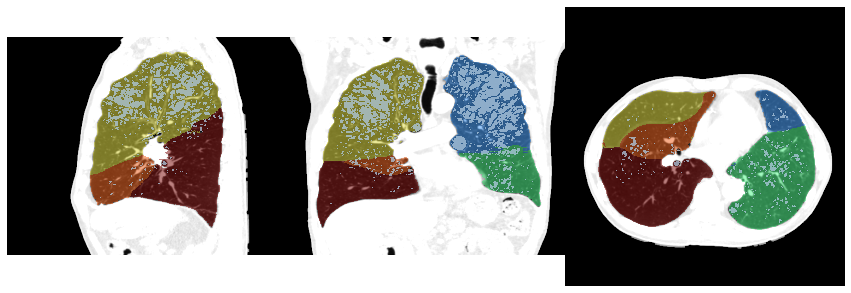

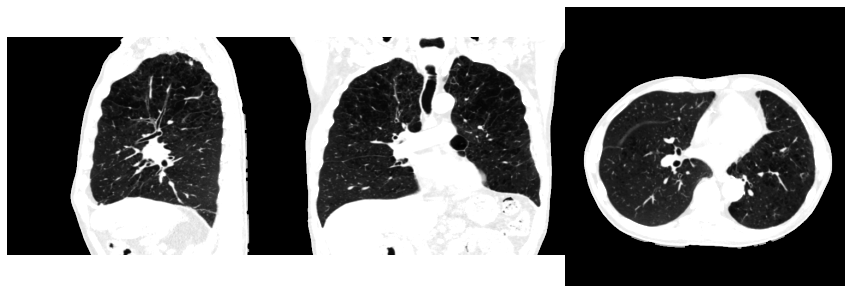

In [131]:
fig_dir = '/home/local/VANDERBILT/litz/github/MASILab/lobe_seg/tmp/figures'
xyz=(200,250,170)
vis_double_overlay_slices(raw, (lsm, emp), xyz, cmaps=["turbo", "Pastel1"], alphas=[0.5, 0.75], clip_range=(-1024, 0))
plt.savefig(os.path.join(fig_dir, "problem_label.png"))
vis_slices(raw, xyz, clip_range=(-1024, 0))
plt.savefig(os.path.join(fig_dir, "problem_raw.png"))
# vis_overlay_slices(raw, emp,xyz, clip_range=(-1024, 0))